In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
# top 40 dax companies 
dax_assets = {
               'DAX': '^GDAXI',
               'Linde': 'LIN',
               'SAP': 'SAP',
               'Deutsche Telekom': 'DTE.DE',
               'Volkswagen': 'VOW3.DE',
               'Siemens': 'SIE.DE',
               'Merck': 'MRK.DE',
               'Airbus': 'AIR.PA',
               'Mercedes Benz': 'MBG.DE', 
               'Bayer': 'BAYZF',
               'BMW': 'BMW.DE',
               'Siemens Healthineers': 'SHL.DE',
               'Deutsche Post': 'DPW.DE',
               'BASF': 'BAS.DE',
               'Münchner Rück': 'MUV2.DE',
               'Infineon': 'IFX.DE',
               'Deutsche Börse': 'DB1:DE',
               'RWE': 'RWE.DE',
               'Henkel': 'HEN3.DE',
               'Adidas': 'ADS.DE',
               'Sartorius': 'SRT.DE',
               'Beiersdorf': 'BEI.DE',
               'Porsche': 'PAH3.DE',
               'E.ON': 'EOAN.DE',
               'Deutsche Bank': 'DB',
               'Vonovia': 'VNA.DE',
               'Fresenius': 'FRE.DE',
               'Symrise': 'SY1.DE',
               'Continental': 'CON.DE',
               'Delivery Hero': 'DHER.F',
               'Brenntag': 'BNR.DE',
               'Qiagen': 'QGEN',
               'Fresenius Medical Care': 'FMS',
               'Siemens Energy': 'ENR.F',
               'HeidelbergCement': 'HEI.DE',
               'Puma': 'PUM.DE',
               'MTU Aero Engines': 'MTX.DE',
               'Covestro': '1COV.F',
               'Zalando': 'ZAL.DE',
               'HelloFresh': 'HFG.DE'
            }

In [3]:
dax_top_40_companies = list(dax_assets.keys())#[1:]
dax_top_40_tickername = list(dax_assets.values())#[1:]

In [4]:
start_date = datetime(2019,1,1)
str(start_date.year)+'-'+str(start_date.month)+'-'+str(start_date.day)

'2019-1-1'

In [5]:
start_date = '2010-1-1'
end_date = '2022-9-15'
na_percentage = 0.6 # at least x percent rows must be none-nas

# download DAX top40
df = yf.download(dax_top_40_tickername, 
                    start=start_date, 
                    end=end_date,
                    progress=True)
# drop columns
df = df['Close']
# rename columns
df.columns = dax_top_40_companies
# make sure the index is datetime format
df.index = pd.to_datetime(df.index)
# drop nas
datetimeFormat = '%Y-%m-%d'
time_delta = datetime.strptime(end_date, datetimeFormat) - datetime.strptime(start_date,datetimeFormat)
df.dropna(axis=1, thresh=int(time_delta.days * na_percentage), inplace=True)
# show data
df.head()

[*********************100%***********************]  40 of 40 completed

1 Failed download:
- DB1:DE: No data found, symbol may be delisted


,Linde,SAP,Deutsche Telekom,Volkswagen,Siemens,Merck,Airbus,Mercedes Benz,Bayer,Deutsche Post,...,Symrise,Continental,Delivery Hero,Brenntag,Qiagen,Siemens Energy,HeidelbergCement,Puma,Covestro,HelloFresh
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,80.400002,NaN,NaN,NaN,NaN,67.662216,NaN,...,NaN,NaN,23.212057,NaN,46.810001,NaN,NaN,NaN,NaN,NaN
2010-01-04,38.505001,13.990,44.849998,80.400002,46.445000,32.049999,NaN,36.867805,69.875954,13.980,...,37.068539,24.090000,23.555094,68.731125,47.110001,63.442383,3.8500,15.515,64.114349,6048.299805
2010-01-05,39.720001,13.945,44.169998,80.400002,46.200001,32.310001,NaN,39.174160,71.211830,14.000,...,38.269535,24.010000,23.264032,68.292587,46.820000,63.481140,3.9675,15.520,62.871826,6031.859863
2010-01-06,39.400002,14.070,44.450001,78.949997,46.165001,32.810001,NaN,39.430424,69.980919,14.155,...,39.021763,23.625000,23.513514,68.163017,47.910000,63.713711,3.9675,16.020,64.611359,6034.330078
2010-01-07,39.744999,14.210,44.154999,78.949997,45.700001,33.099998,NaN,44.483124,70.772903,14.125,...,41.274170,23.504999,23.617464,67.873978,49.169998,64.469551,3.9550,15.910,65.356880,6019.359863


In [6]:
# check if any NAs 
df.isna().sum()

Linde                60
SAP                  34
Deutsche Telekom     60
Volkswagen           88
Siemens              60
Merck                60
Airbus              120
Mercedes Benz        60
Bayer                88
Deutsche Post        60
BASF                 60
Infineon             60
Deutsche Börse       88
RWE                  60
Henkel               60
Adidas               60
Beiersdorf           60
Porsche              88
E.ON                 60
Deutsche Bank        60
Vonovia              60
Fresenius            60
Symrise              60
Continental          60
Delivery Hero        88
Brenntag             60
Qiagen               88
Siemens Energy       60
HeidelbergCement     60
Puma                 60
Covestro             60
HelloFresh           65
dtype: int64

In [7]:
df = df.interpolate(method='time', limit=7).fillna(value=None, method='bfill', axis=0, inplace=False, limit=7, downcast=None)

In [8]:
# check if any NAs left
df.isna().sum()

Linde                0
SAP                  0
Deutsche Telekom     0
Volkswagen           0
Siemens              0
Merck                0
Airbus              55
Mercedes Benz        0
Bayer                0
Deutsche Post        0
BASF                 0
Infineon             0
Deutsche Börse       0
RWE                  0
Henkel               0
Adidas               0
Beiersdorf           0
Porsche              0
E.ON                 0
Deutsche Bank        0
Vonovia              0
Fresenius            0
Symrise              0
Continental          0
Delivery Hero        0
Brenntag             0
Qiagen               0
Siemens Energy       0
HeidelbergCement     0
Puma                 0
Covestro             0
HelloFresh           0
dtype: int64

In [9]:
df.head()

,Linde,SAP,Deutsche Telekom,Volkswagen,Siemens,Merck,Airbus,Mercedes Benz,Bayer,Deutsche Post,...,Symrise,Continental,Delivery Hero,Brenntag,Qiagen,Siemens Energy,HeidelbergCement,Puma,Covestro,HelloFresh
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,38.505001,13.990,44.849998,80.400002,46.445000,32.049999,NaN,36.867805,67.662216,13.980,...,37.068539,24.090000,23.212057,68.731125,46.810001,63.442383,3.8500,15.515,64.114349,6048.299805
2010-01-04,38.505001,13.990,44.849998,80.400002,46.445000,32.049999,NaN,36.867805,69.875954,13.980,...,37.068539,24.090000,23.555094,68.731125,47.110001,63.442383,3.8500,15.515,64.114349,6048.299805
2010-01-05,39.720001,13.945,44.169998,80.400002,46.200001,32.310001,NaN,39.174160,71.211830,14.000,...,38.269535,24.010000,23.264032,68.292587,46.820000,63.481140,3.9675,15.520,62.871826,6031.859863
2010-01-06,39.400002,14.070,44.450001,78.949997,46.165001,32.810001,NaN,39.430424,69.980919,14.155,...,39.021763,23.625000,23.513514,68.163017,47.910000,63.713711,3.9675,16.020,64.611359,6034.330078
2010-01-07,39.744999,14.210,44.154999,78.949997,45.700001,33.099998,NaN,44.483124,70.772903,14.125,...,41.274170,23.504999,23.617464,67.873978,49.169998,64.469551,3.9550,15.910,65.356880,6019.359863


# Predict Single Stock Price using FB Neural Prophet

In [10]:
from neuralprophet import NeuralProphet

In [11]:
df_stock = df[['Linde']].copy()
df_stock = df_stock.rename(columns={'Linde':'y', 'Date':'ds'})
df_stock['ds'] = df_stock.index
df_stock = df_stock.reset_index()
df_stock = df_stock[['ds','y']]
df_stock

,ds,y
0,2009-12-31,38.505001
1,2010-01-04,38.505001
2,2010-01-05,39.720001
3,2010-01-06,39.400002
4,2010-01-07,39.744999
...,...,...
3281,2022-09-08,142.360001
3282,2022-09-09,145.360001
3283,2022-09-12,149.220001
3284,2022-09-13,142.899994


In [12]:
METRICS = ['MAE', 'RMSE']
params = {"n_forecasts": 1, "n_lags": 0}

In [13]:
# instantiate model object
m = NeuralProphet(**params)

In [14]:
# set up cross validation
folds = m.crossvalidation_split_df(df_stock, freq="D", k=5, fold_pct=0.20, fold_overlap_pct=0.5)

metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS)

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    train = m.fit(df=df_train, freq="D")
    test = m.test(df=df_test)
    metrics_train = metrics_train.append(train[METRICS].iloc[-1])
    metrics_test = metrics_test.append(test[METRICS].iloc[-1])

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 98.858% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 178
100%|██████████| 128/128 [00:00<00:00, 382.28it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.62E-02, min: 2.34E+00
100%|██████████| 128/128 [00:00<00:00, 385.54it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-tes

In [15]:
metrics_test.describe().loc[["mean", "std", "min", "max"]]

,MAE,RMSE
mean,68.328428,78.858062
std,46.764955,55.051046
min,28.668331,31.508471
max,130.729858,151.977768


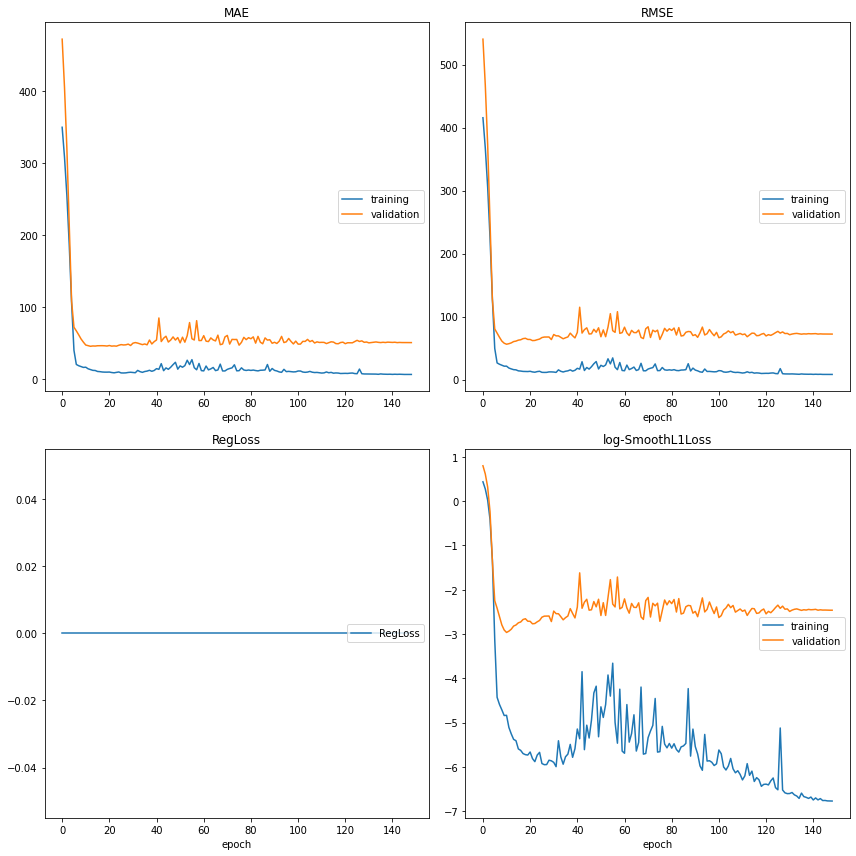

MAE
	training         	 (min:    6.244, max:  350.049, cur:    6.245)
	validation       	 (min:   45.398, max:  472.598, cur:   50.521)
RMSE
	training         	 (min:    8.195, max:  415.616, cur:    8.195)
	validation       	 (min:   56.157, max:  540.308, cur:   72.239)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-SmoothL1Loss
	training         	 (min:   -6.774, max:    0.438, cur:   -6.774)
	validation       	 (min:   -2.965, max:    0.801, cur:   -2.463)


In [16]:
# make a two fold validation
m = NeuralProphet(**params)
df_train, df_val = m.split_df(df_stock, freq='D', valid_p=0.25)
metrics = m.fit(df_train, validation_df=df_val, progress="plot-all")

<AxesSubplot:>

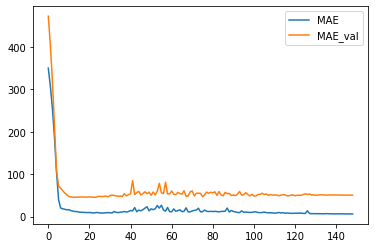

In [17]:
metrics[['MAE', 'MAE_val']].plot()

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 137
100%|██████████| 138/138 [00:00<00:00, 348.48it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.50E-01, min: 3.59E+00
100%|██████████| 138/138 [00:00<00:00, 364.12it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.50E-01, min: 3.08E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.31E-01
Epoch[137/137]: 100%|██████████| 137/137 [00:24<00:00,  5.5

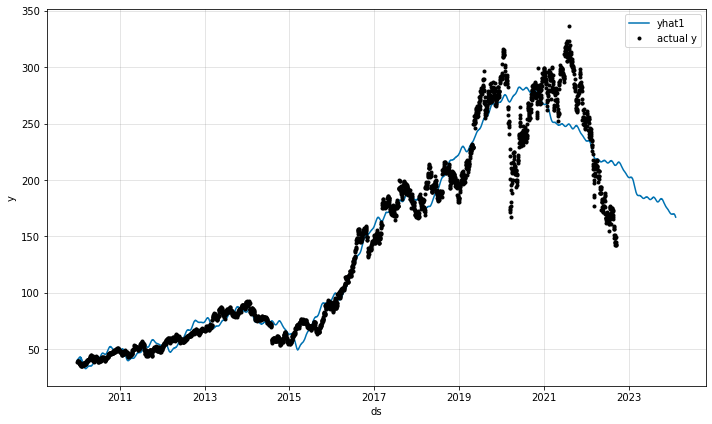

In [18]:
# train model on all data
m = NeuralProphet(**params)

# fit model
metrics = m.fit(df_stock)

# Predictions
future = m.make_future_dataframe(df=df_stock, periods=365, n_historic_predictions=len(df_stock)) #we need to specify the number of days in future
forecast = m.predict(future)

# plot forecast
fig_forecast = m.plot(forecast)

In [20]:
# plot daily portfolio worth
fig = px.line(df, 
              y="Linde", 
              title='Linde')
fig.show()

In [21]:
# normalized daily returns
def normalized_returns(df):
    return np.log(1 + df.pct_change(periods=1).fillna(value=None, method='bfill', axis=0, inplace=False, limit=7, downcast=None)) 

# create weights
def weight_creator(df):
    rand = np.random.random(len(df.columns))
    rand /= rand.sum()
    return rand

# calculate portfolio return
def portfolio_returns(df, weights):
    return np.dot(df.mean(), weights)

# calculate portfolios standard deviation
def portfolio_std(df, weights):
    return (np.dot(np.dot(df.cov(), weights), weights))**(1/2)*np.sqrt(250)

def portfolio_sharp_ratio(portfolio_return:float, portfolio_std:float, rfr:float)->float:
    """Calculate the sharp ratio for a given portfolio df and a given risk-free-return "rfr"."""
    ntd = 250 #  number of trading days
    return np.divide(portfolio_return - rfr/ntd, portfolio_std) 

In [23]:
# plot daily portfolio worth
fig = px.line(normalized_returns(df), 
              y="Linde", 
              title='Linde: Normalized Returns')
fig.show()

In [24]:
# testing the functions
df_returns = normalized_returns(df)
weights = weight_creator(df_returns)
sdev = portfolio_std(df_returns, weights)
returns = portfolio_returns(df_returns, weights)

print('portfolio return: {:.5f}'.format(returns))
print('portfolio standard deviation: {:.2f}'.format(sdev))

portfolio return: 0.00024
portfolio standard deviation: 0.18


In [25]:

def sim2weights_df(weights:list, stock_names:list)->pd.DataFrame:
    """Make dataframe given the portfolios´s weights from the simulations.  
    """
    # initialize weights dataframe with the weights from first simulation
    df_weights = pd.DataFrame(weights[0]).T
    for weights in weights[1:]:
        df_weights = df_weights.append(pd.DataFrame(weights).T, ignore_index=True) 
    # rename columns
    df_weights.columns = stock_names
    return df_weights

def sim2kpi_df(sim_returns:list, sim_standard_deviations:list, sim_sharp_ratios:list)->pd.DataFrame:
    """Generate key performance indicator dataframe from simulation returns, simulation standard deviations and simulation sharp ratios."""
    return pd.DataFrame(data={'portfolio return': sim_returns, 
                               'portfolio standard dev': sim_standard_deviations, 
                               'portfolio sharp ratio': sim_sharp_ratios})

def sim2_df(sim_returns:list, sim_standard_deviations:list, sim_sharp_ratios:list, weights:list, stock_names:list)->pd.DataFrame:
    """Save monte-carlo simulation results in dataframe"""
    sim_weights_df = sim2weights_df(weights, stock_names)
    sim_kpi_df = sim2kpi_df(sim_returns, sim_standard_deviations, sim_sharp_ratios) 
    return sim_weights_df.join(sim_kpi_df)

In [26]:
# Monte-Carlo Simulation
w = []
returns = []
stds = []
srs = []

# caclulate normalized daily returns 
df_returns = normalized_returns(df)

for n in range(10000):
    weights = weight_creator(df_returns)
    portfolio_return = portfolio_returns(df_returns, weights)
    portfolio_stdev = portfolio_std(df_returns, weights) 
    portfolio_sr = portfolio_sharp_ratio(portfolio_return, portfolio_stdev, rfr=0.02)
    w.append(weights)
    returns.append(portfolio_return)
    stds.append(portfolio_stdev)
    srs.append(portfolio_sr)

In [27]:
# save simulation results in dataframe
stock_names = list(df.columns)
df_simulation = sim2_df(returns, stds, srs, w, stock_names)
df_simulation.head()

,Linde,SAP,Deutsche Telekom,Volkswagen,Siemens,Merck,Airbus,Mercedes Benz,Bayer,Deutsche Post,...,Brenntag,Qiagen,Siemens Energy,HeidelbergCement,Puma,Covestro,HelloFresh,portfolio return,portfolio standard dev,portfolio sharp ratio
0,0.055539,0.051075,0.002841,0.010497,0.039919,0.025400,0.021428,0.014594,0.035908,0.022589,...,0.052034,0.018477,0.028940,0.001428,0.054160,0.021917,0.052302,0.000208,0.183054,0.000700
1,0.014832,0.045613,0.049196,0.032304,0.033953,0.001344,0.004647,0.044316,0.002234,0.021256,...,0.017237,0.034782,0.054466,0.054669,0.061612,0.034084,0.009656,0.000300,0.183064,0.001203
2,0.058269,0.025827,0.000856,0.050469,0.033783,0.043338,0.015096,0.020576,0.037903,0.016722,...,0.045875,0.045370,0.054637,0.045809,0.023727,0.023381,0.033312,0.000202,0.187011,0.000654
3,0.035701,0.005011,0.026476,0.044473,0.039727,0.050374,0.044589,0.013138,0.018450,0.020959,...,0.025570,0.013124,0.023318,0.020965,0.040506,0.054704,0.002979,0.000238,0.181126,0.000870
4,0.008801,0.038543,0.037662,0.005453,0.036527,0.002178,0.027213,0.024892,0.053829,0.052691,...,0.049593,0.050846,0.002254,0.043989,0.004895,0.029110,0.031133,0.000194,0.190540,0.000600


In [28]:
# plot returns vs risk
fig = px.scatter(x=df_simulation['portfolio standard dev'], 
                 y=df_simulation['portfolio return']*100,
                 color=df_simulation['portfolio sharp ratio']*100,
                 labels={'y': 'return [%]', 'x': 'standard deviation', 'color': 'sharp ratio'},
                 width=600, 
                 title='Portfolio´s Returns and Risks Monte-Carlo Simulation')
fig.show()

In [29]:
# find mimimum risk (i.e. variance) portfolio
def min_variance_portfolio(df_simulation:pd.DataFrame, stocknames:list)->pd.DataFrame:
    """Get weights of the portfolio with minimal variance or risk. Input dataframe of the simulation and a list of the stock names"""
    return df_simulation.sort_values(by='portfolio standard dev')[stocknames].iloc[0,:].values

In [30]:
weights_opt = min_variance_portfolio(df_simulation, stock_names)

In [31]:
# testing the functions
df_returns = normalized_returns(df)
sdev = portfolio_std(df_returns, weights_opt)
returns = portfolio_returns(df_returns, weights_opt)

print('portfolio return: {:.5f}'.format(returns*100))
print('portfolio standard deviation: {:.2f}'.format(sdev))

portfolio return: 0.02294
portfolio standard deviation: 0.17


In [32]:
# find optimal portfolio for given risk

# define risk bounds i.e. maximal acceptable risk
risk_bounds = (0, 0.2)
risk_indices = df_simulation['portfolio standard dev'].between(risk_bounds[0], risk_bounds[1])

# find optimal weights
weights_opt = df_simulation[risk_indices].sort_values(by='portfolio return', ascending=False)[stock_names].iloc[0,:].values
weights_opt

array([0.0623579 , 0.04553226, 0.01983632, 0.0140151 , 0.00059803,
       0.06891358, 0.04012974, 0.05251398, 0.00051094, 0.05335222,
       0.03505794, 0.03081766, 0.01451296, 0.01903502, 0.01484581,
       0.06636726, 0.01939119, 0.02659533, 0.00533209, 0.05541275,
       0.05147677, 0.02496835, 0.01371585, 0.01819823, 0.00096816,
       0.02608468, 0.01210897, 0.02342423, 0.06577904, 0.07542488,
       0.02312222, 0.01960054])

In [33]:
# testing the functions
df_returns = normalized_returns(df)
sdev = portfolio_std(df_returns, weights_opt)
returns = portfolio_returns(df_returns, weights_opt)

print('portfolio return: {:.5f}'.format(returns*100))
print('portfolio standard deviation: {:.2f}'.format(sdev))

portfolio return: 0.03472
portfolio standard deviation: 0.19
